<a href="https://colab.research.google.com/github/mietekdom/Nepal_Solar-Radiation-Measurments/blob/main/Nepal_solar_radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

**Import data**

In [59]:
df = pd.read_csv('https://energydata.info/dataset/ead8d2fa-de59-48d3-8693-817b36b3a470/resource/ef17f691-0256-497d-a5ee-3c6a334ae1e2/download/solar-measurements_nepal_dharan_wb-esmap_qc.csv', 
                 index_col=0)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
time,,,,,,,,,,,,,
2018-07-01 00:01,0.0,NaN,NaN,26.7,95.0,2.5,3.2,8.2,27.9,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:02,0.0,NaN,NaN,26.7,94.5,2.3,2.9,7.5,24.3,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:03,0.0,NaN,NaN,26.7,94.3,2.4,3.2,9.0,20.7,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:04,0.0,NaN,NaN,26.7,94.3,2.5,2.9,8.9,15.6,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:05,0.0,NaN,NaN,26.8,94.2,2.1,2.9,7.4,15.4,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964800 entries, 2018-07-01 00:01 to 2020-05-01 00:00
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ghi                         964800 non-null  float64
 1   dni                         933840 non-null  float64
 2   dhi                         933840 non-null  float64
 3   air_temperature             964800 non-null  float64
 4   relative_humidity           964800 non-null  float64
 5   wind_speed                  964800 non-null  float64
 6   wind_speed_of_gust          964800 non-null  float64
 7   wind_from_direction_st_dev  964800 non-null  float64
 8   wind_from_direction         964800 non-null  float64
 9   barometric_pressure         964800 non-null  float64
 10  rain                        964800 non-null  float64
 11  sensor_cleaning             964800 non-null  int64  
 12  comments                    182153 non-null  object 

Description:

ghi	- Global horizontal irradiance (W/m²) from thermopile pyranometer

dni	- Direct normal irradiance (W/m²) from thermopile pyrheliometer

dhi	- Diffused horizontal irradiance (W/m²) from thermopile pyranometer


In [61]:
df.columns

Index(['ghi', 'dni', 'dhi', 'air_temperature', 'relative_humidity',
       'wind_speed', 'wind_speed_of_gust', 'wind_from_direction_st_dev',
       'wind_from_direction', 'barometric_pressure', 'rain', 'sensor_cleaning',
       'comments'],
      dtype='object')

**Rain analysis**

In [62]:
df_rain = df['rain']
df_rain

time
2018-07-01 00:01    0.0
2018-07-01 00:02    0.0
2018-07-01 00:03    0.0
2018-07-01 00:04    0.0
2018-07-01 00:05    0.0
                   ... 
2020-04-30 23:56    0.0
2020-04-30 23:57    0.0
2020-04-30 23:58    0.0
2020-04-30 23:59    0.0
2020-05-01 00:00    0.0
Name: rain, Length: 964800, dtype: float64

In [69]:
df_rain_2018 = df_rain.loc['2018-07-01 00:01' : '2018-12-31 23:59']
df_rain_2018

time
2018-07-01 00:01    0.0
2018-07-01 00:02    0.0
2018-07-01 00:03    0.0
2018-07-01 00:04    0.0
2018-07-01 00:05    0.0
                   ... 
2018-12-31 23:55    0.0
2018-12-31 23:56    0.0
2018-12-31 23:57    0.0
2018-12-31 23:58    0.0
2018-12-31 23:59    0.0
Name: rain, Length: 264959, dtype: float64

In [72]:
df_rain_2018.resample('D').sum()

TypeError: ignored

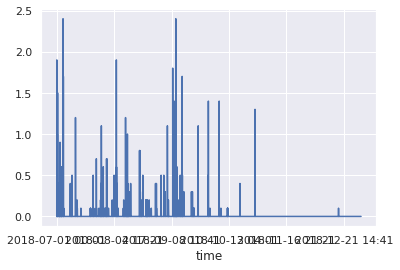

In [71]:
_ = df_rain_2018.plot()